In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR  # Import the SVR model from sklearn

In [2]:
# Importing data
data = pd.read_csv('Dataset.csv')
predictors = ['Lomba', 'Organisasi', 'IPS_1', 'IPS_2', 'IPS_3', 'Absensi_smstr_1', 'Absensi_smstr_2', 'Absensi_smstr_3', 'SKS_smstr_1', 'SKS_smstr_2', 'SKS_smstr_3']
label = 'Prestasi'

In [3]:
# Encoding categorical features
le = dict()
for column in data.columns:
    if data[column].dtype == np.object:
        le[column] = LabelEncoder()
        data[column] = le[column].fit_transform(data[column])

C:\Users\aslan\AppData\Local\Temp\ipykernel_11404\2683096185.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data[column].dtype == np.object:


In [4]:
# Variabel Independen
X = data.drop([label], axis=1)

In [5]:
# Variabel Dependen
y = data[label]

In [6]:
# Data Testing and Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [7]:
# Create and train the SVR model
regressor = SVR(kernel='linear')  # Use 'linear' kernel for simplicity
regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [8]:
# Prediction
y_pred = regressor.predict(X_test)

In [9]:
# Perhitungan Akurasi
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE :', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('Nilai akurasi :', (1 - (np.mean(np.abs((y_test - y_pred) / y_test)))) * 100)

Mean Absolute Error: 0.12438961237465967
Mean Squared Error: 0.02014544395278539
Root Mean Squared Error: 0.14193464676669115
MAPE : inf
Nilai akurasi : -inf


In [10]:
# Nilai Koefiisien Determinasi Data Testing
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8925576322518113

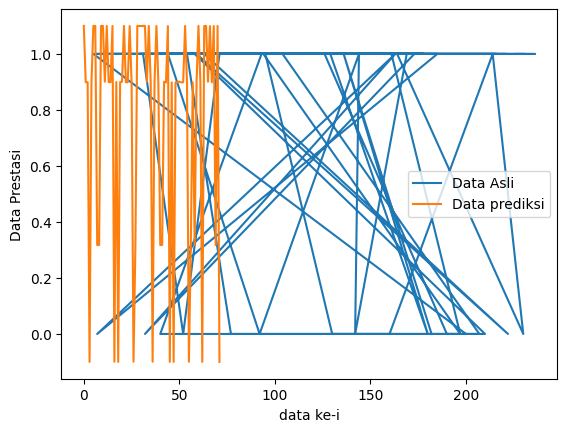

In [11]:
# Perbandingan nilai aktual dan prediksi
import matplotlib.pyplot as plt
plt.plot(y_test, label="Data Asli")
plt.plot(y_pred, label="Data prediksi")
plt.ylabel('Data Prestasi')
plt.xlabel('data ke-i')
plt.legend()
plt.show()

In [12]:
# Save the model to a file
pickle.dump(regressor, open('modelsvm.pkl', 'wb'))

In [13]:
# Load the model from file and make a prediction
model = pickle.load(open('modelsvm.pkl', 'rb'))
print(model.predict([[0, 1, 2.8, 3.1, 2.9, 16, 14, 13, 19, 20, 22]]))

[0.31772136]


C:\Users\aslan\anaconda3\envs\aslan\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
